In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

/Users/sofiaforni/Documents/Data Science/TPFinal_MeliDataScience/venv_tpfinal/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
#Unión de los archivos con sus respectivas categorías de búsqueda

files = {
    'juguetes':'mla1132_meli.csv',
    'elementos de fotografia': 'mla1039_meli.csv',
    'cuidado de la piel': 'mla1246_meli.csv',
    'accesorios' : 'mla3937_meli.csv',
    'herramientas' : 'mla407134_meli.csv'
}

out_df = pd.DataFrame()
for key,value in files.items():
    df = pd.read_csv(f'./Data/{value}')
    df['Categoria']=key
    out_df = pd.concat([out_df, df])

out_df.to_csv(f'./Data/Categorias_complete.csv', index=False)

In [4]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 3996
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   id                                                                 19991 non-null  object 
 1   title                                                              19991 non-null  object 
 2   thumbnail_id                                                       19991 non-null  object 
 3   listing_type_id                                                    19991 non-null  object 
 4   permalink                                                          19991 non-null  object 
 5   category_id                                                        19991 non-null  object 
 6   domain_id                                                          19991 non-null  object 
 7   order_backend          

In [5]:
out_df.head()

,id,title,thumbnail_id,listing_type_id,permalink,category_id,domain_id,order_backend,price,sold_quantity,...,seller__seller_reputation__metrics__cancellations__value,installments__quantity,installments__amount,installments__rate,days_remaining,years_active,Categoria,seller__car_dealer,seller__car_dealer_logo,variation_filters
0,MLA1112140771,Pileta Inflable Redonda Bestway Kiddie Lounge ...,623284-MLA53605777143_022023,gold_pro,https://www.mercadolibre.com.ar/pileta-inflabl...,MLA11226,MLA-INFLATABLE_POOLS,1,1692.9,250,...,0,6.0,282.15,0.00,6833,4,juguetes,NaN,NaN,NaN
1,MLA1275803410,Cry Babies Fantasy Dreamy Imc Toys 99180im,843969-MLA48269133730_112021,gold_special,https://www.mercadolibre.com.ar/cry-babies-fan...,MLA2968,MLA-DOLLS,2,15990.0,200,...,135,6.0,3953.53,48.35,7223,4,juguetes,NaN,NaN,NaN
2,MLA1109575910,Juego De Cartas Desconectados En Palabras,633026-MLA48408537360_122021,gold_special,https://www.mercadolibre.com.ar/juego-de-carta...,MLA1161,MLA-BOARD_GAMES,3,6499.0,5000,...,1,6.0,1606.88,48.35,6815,2,juguetes,NaN,NaN,NaN
3,MLA1110677111,Juego De Mesa Código Secreto Czech Games Editi...,960516-MLA44936648183_022021,gold_special,https://www.mercadolibre.com.ar/juego-de-mesa-...,MLA1161,MLA-BOARD_GAMES,4,9500.0,250,...,5,6.0,2348.88,48.35,6822,16,juguetes,NaN,NaN,NaN
4,MLA1240728057,Bellies Bebe Interactivo Beth Edic Especial In...,994457-MLA49925702800_052022,gold_special,https://www.mercadolibre.com.ar/bellies-bebe-i...,MLA2968,MLA-DOLLS,5,21900.0,0,...,28,6.0,5414.78,48.35,7200,10,juguetes,NaN,NaN,NaN


## EDA

In [6]:
out_df.columns

Index(['id', 'title', 'thumbnail_id', 'listing_type_id', 'permalink',
       'category_id', 'domain_id', 'order_backend', 'price', 'sold_quantity',
       'available_quantity', 'tags', 'shipping__logistic_type',
       'shipping__mode', 'shipping__store_pick_up', 'shipping__free_shipping',
       'shipping__tags', 'seller__id', 'seller__nickname', 'seller__tags',
       'seller__seller_reputation__level_id',
       'seller__seller_reputation__power_seller_status',
       'seller__seller_reputation__transactions__canceled',
       'seller__seller_reputation__transactions__completed',
       'seller__seller_reputation__transactions__ratings__negative',
       'seller__seller_reputation__transactions__ratings__neutral',
       'seller__seller_reputation__transactions__ratings__positive',
       'seller__seller_reputation__transactions__total',
       'seller__seller_reputation__metrics__sales__period',
       'seller__seller_reputation__metrics__sales__completed',
       'seller__seller_r

/Users/sofiaforni/Documents/Data Science/TPFinal_MeliDataScience/venv_tpfinal/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


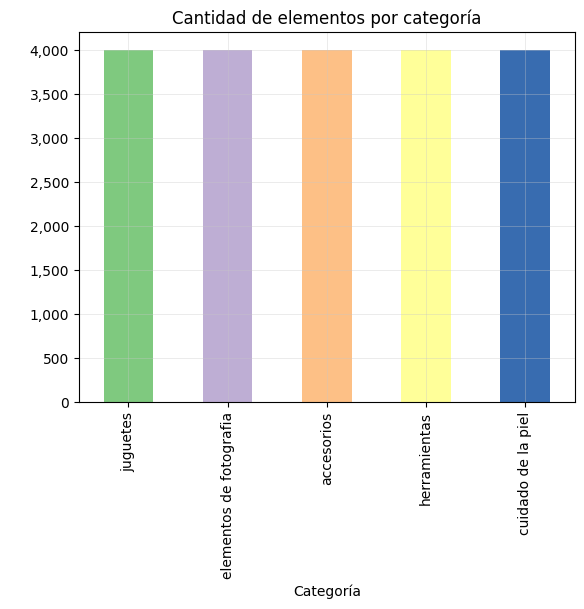

In [7]:
c=['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0']
ax=out_df['Categoria'].value_counts().plot(kind = 'bar', title='Cantidad de elementos por categoría', color= c,xlabel='Categoría', ylabel=' ',)
ax=plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
ax=plt.grid(color='#c7c7c7', linewidth=0.5, axis='both', alpha=0.5)

In [8]:
# Reindexamos la base de datos que fue concatenada

out_df.reset_index(inplace=True)

In [9]:
#AutoEDA

prof = ProfileReport(out_df)
prof.to_file(output_file='eda_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
columns = out_df.columns

In [11]:
#Eliminamos las columnas que hacen referencias a cuestiones vinculadas al vendedor

regex = re.compile('^seller__')
seller_columns = list(filter(regex.match, columns))
print(seller_columns)

['seller__id', 'seller__nickname', 'seller__tags', 'seller__seller_reputation__level_id', 'seller__seller_reputation__power_seller_status', 'seller__seller_reputation__transactions__canceled', 'seller__seller_reputation__transactions__completed', 'seller__seller_reputation__transactions__ratings__negative', 'seller__seller_reputation__transactions__ratings__neutral', 'seller__seller_reputation__transactions__ratings__positive', 'seller__seller_reputation__transactions__total', 'seller__seller_reputation__metrics__sales__period', 'seller__seller_reputation__metrics__sales__completed', 'seller__seller_reputation__metrics__claims__period', 'seller__seller_reputation__metrics__claims__rate', 'seller__seller_reputation__metrics__claims__value', 'seller__seller_reputation__metrics__delayed_handling_time__period', 'seller__seller_reputation__metrics__delayed_handling_time__rate', 'seller__seller_reputation__metrics__delayed_handling_time__value', 'seller__seller_reputation__metrics__cancellat

In [21]:
out_df.drop(columns=seller_columns, inplace=True)

KeyError: "['seller__id' 'seller__nickname' 'seller__tags'\n 'seller__seller_reputation__level_id'\n 'seller__seller_reputation__power_seller_status'\n 'seller__seller_reputation__transactions__canceled'\n 'seller__seller_reputation__transactions__completed'\n 'seller__seller_reputation__transactions__ratings__negative'\n 'seller__seller_reputation__transactions__ratings__neutral'\n 'seller__seller_reputation__transactions__ratings__positive'\n 'seller__seller_reputation__transactions__total'\n 'seller__seller_reputation__metrics__sales__period'\n 'seller__seller_reputation__metrics__sales__completed'\n 'seller__seller_reputation__metrics__claims__period'\n 'seller__seller_reputation__metrics__claims__rate'\n 'seller__seller_reputation__metrics__claims__value'\n 'seller__seller_reputation__metrics__delayed_handling_time__period'\n 'seller__seller_reputation__metrics__delayed_handling_time__rate'\n 'seller__seller_reputation__metrics__delayed_handling_time__value'\n 'seller__seller_reputation__metrics__cancellations__period'\n 'seller__seller_reputation__metrics__cancellations__rate'\n 'seller__seller_reputation__metrics__cancellations__value'\n 'seller__car_dealer' 'seller__car_dealer_logo'] not found in axis"

In [22]:
out_df.drop(columns=['id', 'title', 'thumbnail_id', 'permalink', 'order_backend', 'tags', 'category_id', 'df_index'], inplace=True)
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   listing_type_id          19991 non-null  object 
 1   domain_id                19991 non-null  object 
 2   price                    19991 non-null  float64
 3   sold_quantity            19991 non-null  int64  
 4   available_quantity       19991 non-null  int64  
 5   shipping__logistic_type  19991 non-null  object 
 6   shipping__mode           15993 non-null  object 
 7   shipping__store_pick_up  19991 non-null  bool   
 8   shipping__free_shipping  19991 non-null  bool   
 9   shipping__tags           19991 non-null  object 
 10  installments__quantity   19987 non-null  float64
 11  installments__amount     19987 non-null  float64
 12  installments__rate       19987 non-null  float64
 13  days_remaining           19991 non-null  int64  
 14  years_active          

In [23]:
import pickle
with open('df_categorias.pkl', 'wb') as f_df:
    pickle.dump(out_df, f_df)

['MLA-INFLATABLE_POOLS', 'MLA-DOLLS', 'MLA-BOARD_GAMES', 'MLA-STUFFED_TOYS', 'MLA-KICK_SCOOTERS', 'MLA-ACTION_FIGURES', 'MLA-STICKER_ALBUMS', 'MLA-PUZZLE_CUBES', 'MLA-DOLL_AND_ACTION_FIGURE_SETS', 'MLA-BEACH_TEJOS', 'MLA-TOYS_AND_GAMES', 'MLA-TOY_ROBOTS', 'MLA-TOY_BUILDING_SETS', 'MLA-PLAYING_CARDS', 'MLA-BABY_GYMS', 'MLA-MAGNETIC_DRAWING_BOARDS', 'MLA-REMOTE_CONTROL_TOY_VEHICLES', 'MLA-POOL_INFLATABLES', 'MLA-TOY_PRETEND_SUITCASES', 'MLA-TRAMPOLINE_SPRINGS', 'MLA-TABLE_TENNIS_RACKETS', 'MLA-PUSH_AND_RIDING_TOYS', 'MLA-PUZZLES', 'MLA-BALANCE_BICYCLES', 'MLA-COLLECTIBLE_ALBUM_STICKERS', 'MLA-TRADING_CARD_GAMES', 'MLA-KIDS_TENTS', 'MLA-ANIMAL_AND_BALL_HOPPERS', 'MLA-KIDS_TRICYCLES', 'MLA-CHALKBOARDS_AND_WHITEBOARDS', 'MLA-TABLE_TENNIS_NETS', 'MLA-POKER_SETS', 'MLA-BEACH_PADDLES', 'MLA-JEWELRY_MAKING_KITS', 'MLA-BABY_ACTIVITY_TABLES', 'MLA-BEACH_TOYS_SETS', 'MLA-NON_REMOTE_CONTROL_TOY_VEHICLES', 'MLA-TOY_KEYBOARDS_AND_PIANOS', 'MLA-BALL_PIT_BALLS', 'MLA-TOY_PRETEND_PLAY_BLENDERS', 'MLA-KI

In [30]:
print(out_df.variation_filters.unique().tolist())

[282.15, 3953.53, 1606.88, 2348.88, 5414.78, 1706.0, 2000.5, 2274.68, 1434.05, 1110.15, 2153.33, 1990.36, 862.9, 3706.28, 683.33, 341.67, 714.31, 420.08, 3285.03, 1666.71, 516.75, 2141.93, 640.13, 1246.39, 926.94, 1853.26, 803.56, 1730.75, 716.78, 3041.15, 776.61, 1728.28, 4178.28, 3463.33, 4476.46, 563.73, 417.85, 1730.5, 1112.6, 5362.85, 660.03, 1236.0, 822.11, 3634.55, 764.0, 778.84, 10506.02, 1162.08, 2112.58, 717.03, 2052.15, 420.33, 5333.33, 1233.78, 741.5, 559.03, 2222.78, 378.05, 808.26, 1060.7, 2101.38, 749.17, 3436.75, 907.16, 3026.86, 3335.4, 1338.61, 1037.21, 892.33, 986.53, 590.93, 415.13, 4293.33, 4870.82, 3053.33, 2719.73, 2123.88, 1581.91, 3007.43, 1077.99, 464.58, 1477.67, 967.5, 6423.33, 939.53, 1884.29, 1681.3, 1332.92, 442.57, 8727.68, 3383.62, 1038.45, 1075.29, 1978.0, 300.68, 1211.53, 2225.25, 2470.03, 441.36, 1251.09, 1159.6, 1483.25, 2771.62, 509.25, 5142.8, 864.39, 1390.6, 900.98, 642.6, 1481.03, 153.27, 666.83, 986.28, 785.7, 2826.07, 345.9, 865.38, 553.1, 137

In [271]:
#Creamos dummies para las variables categoricas que usaremos

out_df = pd.get_dummies(out_df, columns=['domain_id', 'listing_type_id', 'shipping__logistic_type', 'shipping__mode', 'shipping__tags', 'variation_filters'])

In [272]:
#Eliminamos valores faltantes

out_df.dropna(inplace=True)
out_df.shape

(19987, 935)

## Premodel

In [273]:
# Separamos las variables independientes de la target
X=out_df.drop(columns=['Categoria']) #, 'id', 'title', 'thumbnail_id', 'permalink', 'order_backend', 'tags', 'category_id', 'df_index'
y=out_df['Categoria']

# Dividimos los datos en el set de train y el de test: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13391, 927)

(6596, 927)

(13391,)

(6596,)

In [274]:
X.columns.values

array(['index', 'price', 'sold_quantity', 'available_quantity',
       'shipping__store_pick_up', 'shipping__free_shipping',
       'installments__quantity', 'installments__amount',
       'installments__rate', 'days_remaining', 'years_active',
       'domain_id_MLA-ABRASIVE_SAWS',
       'domain_id_MLA-ACTION_CAMERA_ACCESSORIES_KITS',
       'domain_id_MLA-ACTION_CAMERA_ANTI_FOG_INSERTS',
       'domain_id_MLA-ACTION_CAMERA_MOUNTS',
       'domain_id_MLA-ACTION_FIGURES', 'domain_id_MLA-ADULT_DIAPERS',
       'domain_id_MLA-AFTERSHAVES', 'domain_id_MLA-AFTER_SUNS',
       'domain_id_MLA-AIRBRUSHES', 'domain_id_MLA-AIR_COMPRESSORS',
       'domain_id_MLA-AIR_COMPRESSOR_HOSES',
       'domain_id_MLA-AIR_POWER_BALLS', 'domain_id_MLA-ALARM_CLOCKS',
       'domain_id_MLA-AMBIENT_THERMOMETERS',
       'domain_id_MLA-ANALOG_CAMERAS', 'domain_id_MLA-ANALOG_RAIN_GAUGES',
       'domain_id_MLA-ANEMOMETERS',
       'domain_id_MLA-ANIMAL_AND_BALL_HOPPERS',
       'domain_id_MLA-ANTIBACTERIAL_ALCOH

## Classification models (pipeline)

In [275]:
# class GetDummiesTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, columns):
#         self.columns = columns
    
#     def transform(self, X, *_):
#         if not isinstance(X, pd.DataFrame):
#             raise TypeError("Este Transformador solo funciona en DF de Pandas")
        
#         out = pd.get_dummies(X, columns=self.columns, drop_first=True)
#         out.dropna(how='all', inplace=True)
#         return out

#     def fit(self, X, *_):
#         return self

In [276]:
class CustomFeatureSelection(BaseEstimator, TransformerMixin):
    
    def __init__(self, selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [277]:
selector = CustomFeatureSelection(selected_features=X.columns.values)

In [278]:
pasos = [('feature_engineering',selector),
         ('preprocesamiento', MinMaxScaler()), 
         ('clasificador', KNeighborsClassifier())]

pipe=Pipeline(pasos)

In [279]:
from sklearn.ensemble import RandomForestClassifier

In [280]:
param_grid = [{'feature_engineering':[selector, None],
               'preprocesamiento':[StandardScaler(), MinMaxScaler(), None],
               'clasificador': [KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(solver='lbfgs')]}]

In [281]:
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [282]:
grid_categorias = GridSearchCV(pipe, param_grid, cv=folds)
grid_categorias.fit(X_train, y_train)

/Users/sofiaforni/Documents/Data Science/TPFinal_MeliDataScience/venv_tpfinal/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/sofiaforni/Documents/Data Science/TPFinal_MeliDataScience/venv_tpfinal/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        CustomFeatureSelection(selected_features=array(['index', 'price', 'sold_quantity', 'available_quantity',
       'shipping__store_pick_up', 'shipping__free_shipping',
       'installments__quantity', 'installments__amount',
       'installments__rate', 'days_...
       "variation_filters_['WRISTBAND_COLOR', 'BEZEL_COLOR']",
       "variation_filters_['WRISTBAND_COLOR']",
       "variation_filters_['WRISTBAND_DESIGN']",
       "variation_filters_['anillo 4x4']",
       "variation_filters_['color y medida']",
       "variation_filters_['color']", "variation_filters_['grosor']",
       "variation_filters_['tamaño']"], dtype=object)),
                                                  None],
                          'preprocesamiento': [StandardScaler(), MinMaxScaler(),
                                             

### Resultados pipeline

In [283]:
grid_categorias.best_score_

0.9949220014267471

In [284]:
grid_categorias.best_estimator_

Pipeline(steps=[('feature_engineering',
                 CustomFeatureSelection(selected_features=array(['index', 'price', 'sold_quantity', 'available_quantity',
       'shipping__store_pick_up', 'shipping__free_shipping',
       'installments__quantity', 'installments__amount',
       'installments__rate', 'days_remaining', 'years_active',
       'domain_id_MLA-ABRASIVE_SAWS',
       'domain_id_MLA-ACTION_CAMER...
       "variation_filters_['WRISTBAND_COLOR', 'BEZEL_COLOR']",
       "variation_filters_['WRISTBAND_COLOR']",
       "variation_filters_['WRISTBAND_DESIGN']",
       "variation_filters_['anillo 4x4']",
       "variation_filters_['color y medida']",
       "variation_filters_['color']", "variation_filters_['grosor']",
       "variation_filters_['tamaño']"], dtype=object))),
                ('preprocesamiento', StandardScaler()),
                ('clasificador', LogisticRegression())])

In [285]:
accuracy_score(grid_categorias.best_estimator_.predict(X_test),y_test)

0.9957550030321407

In [286]:
y_pred = grid_categorias.best_estimator_.predict(X_test)

In [287]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                         precision    recall  f1-score   support

             accesorios       1.00      1.00      1.00      1374
     cuidado de la piel       1.00      0.99      1.00      1326
elementos de fotografia       0.99      1.00      1.00      1326
           herramientas       0.99      1.00      0.99      1270
               juguetes       1.00      0.99      1.00      1300

               accuracy                           1.00      6596
              macro avg       1.00      1.00      1.00      6596
           weighted avg       1.00      1.00      1.00      6596

0.9957550030321407


# Nueva clasificación: subcategorías

In [288]:
data_subcategorias = pd.read_csv('./Data/mla3937_meli.csv')

In [289]:
data_subcategorias['category_id'].value_counts()

MLA1442      1119
MLA352679     738
MLA1436       672
MLA4559       278
MLA1432       240
MLA6312       236
MLA417313     122
MLA434353     114
MLA1438        99
MLA7715        68
MLA1440        57
MLA3949        28
MLA9291        26
MLA399230      25
MLA414225      24
MLA417306      20
MLA417982      19
MLA1437        18
MLA418339      14
MLA437168      13
MLA430494      13
MLA3938         8
MLA413459       8
MLA431679       7
MLA31342        5
MLA31327        3
MLA417846       3
MLA31347        3
MLA431041       2
MLA431727       2
MLA31328        2
MLA236752       2
MLA431680       2
MLA434345       1
MLA431678       1
MLA3947         1
MLA436820       1
MLA429296       1
MLA434344       1
MLA431735       1
MLA431746       1
Name: category_id, dtype: int64

In [290]:
data_subcategorias.head()

,id,title,thumbnail_id,listing_type_id,permalink,category_id,domain_id,order_backend,price,sold_quantity,...,seller__seller_reputation__metrics__delayed_handling_time__rate,seller__seller_reputation__metrics__delayed_handling_time__value,seller__seller_reputation__metrics__cancellations__period,seller__seller_reputation__metrics__cancellations__rate,seller__seller_reputation__metrics__cancellations__value,installments__quantity,installments__amount,installments__rate,days_remaining,years_active
0,MLA1143742024,Smartwatch Digilink Monitoreo De Sueño Y Pulsa...,602153-MLA51538019666_092022,gold_special,https://articulo.mercadolibre.com.ar/MLA-11437...,MLA352679,MLA-SMARTWATCHES,1,4799.0,250,...,0.0477,338,60 days,0.0073,56,6,1186.55,48.35,7055,11
1,MLA1240842973,Reloj Pulsera Skmei 1389 De Cuerpo Color Plate...,646093-MLA47574132101_092021,gold_special,https://www.mercadolibre.com.ar/reloj-pulsera-...,MLA1442,MLA-WRISTWATCHES,2,7999.0,250,...,0.0002,1,60 days,0.0015,6,6,1977.75,48.35,7200,6
2,MLA1108316534,Colgante Yo Te Cielo,961694-MLA47881890118_102021,gold_special,https://articulo.mercadolibre.com.ar/MLA-11083...,MLA1436,MLA-NECKLACES,3,5990.0,500,...,0.0000,0,60 days,0.0000,0,6,1481.03,48.35,6804,2
3,MLA1182473246,Smartwatch Microwear W26 1.75 Caja De Aleaci...,815732-MLA44916250737_022021,gold_special,https://www.mercadolibre.com.ar/smartwatch-mic...,MLA352679,MLA-SMARTWATCHES,4,6610.0,500,...,0.0004,1,60 days,0.0000,0,6,1634.32,48.35,7157,7
4,MLA1318105189,Reloj Skmei Táctico Militar 1346,751357-MLA31037529763_062019,gold_special,https://www.mercadolibre.com.ar/reloj-skmei-ta...,MLA1442,MLA-WRISTWATCHES,5,3999.0,50,...,0.0000,0,60 days,0.0000,0,6,988.75,48.35,7270,3


In [291]:
data_subcategorias['domain_id'].value_counts()

MLA-WRISTWATCHES                          1119
MLA-SMARTWATCHES                           787
MLA-NECKLACES                              672
MLA-BRACELETS_AND_ANKLE_BRACES             291
MLA-EARRINGS                               240
MLA-WATCH_BANDS                            236
MLA-CHARMS_AND_MEDALS                      236
MLA-RINGS                                   99
MLA-JEWELRY_TOOLS                           72
MLA-JEWELRY                                 57
MLA-ALARM_CLOCKS                            31
MLA-WALL_CLOCKS                             31
MLA-CLOCKS_ACCESSORIES_AND_SPARE_PARTS      22
MLA-JEWELRY_DISPLAYS                        19
MLA-WEDDING_BANDS                           18
MLA-JEWELRY_BOXES                           14
MLA-PIERCINGS                               13
MLA-JEWELRY_AND_WATCHES                      8
MLA-JEWELRY_ROLLS                            8
MLA-JEWELRY_DISPLAYS_AND_BOXES               7
MLA-TABLE_CLOCKS                             5
MLA-RING_SIZE

In [292]:
#Agrupamos subcategorías

def agrupar(fila):

    if re.findall(re.compile('WATCH|CLOCK'), fila):
        return 'MLA-WATCHES'
    if re.findall(re.compile('NECKLACES|BRACELETS|EARRINGS|RINGS'), fila) or re.match(re.compile('MLA-JEWELRY$'), fila):
        return 'MLA-JEWELRY'
    if re.findall(re.compile('MLA-JEWELRY_'), fila):
        return 'MLA-JEWELRY_ACCESORIES'
    else:
        return fila
    
data_subcategorias['nuevo_domain'] = data_subcategorias['domain_id'].apply(lambda x: agrupar(x))
data_subcategorias['nuevo_domain'].value_counts()

MLA-WATCHES                              2245
MLA-JEWELRY                              1359
MLA-CHARMS_AND_MEDALS                     236
MLA-JEWELRY_ACCESORIES                    120
MLA-WEDDING_BANDS                          18
MLA-PIERCINGS                              13
MLA-RING_SIZERS                             3
MLA-TIPPED_PLIERS                           1
MLA-PRECIOUS_AND_SEMI_PRECIOUS_STONES       1
MLA-BROOCHES                                1
MLA-CUTTING_PLIERS                          1
Name: nuevo_domain, dtype: int64

In [293]:
#Nos quedamos con los dominios con al menos 20 registros

valid_domains = ['MLA-WATCHES', 'MLA-JEWELRY', 'MLA-CHARMS_AND_MEDALS', 'MLA-JEWELRY_ACCESORIES']

In [294]:
data_subcategorias['is_valid'] = data_subcategorias['nuevo_domain'].apply(lambda x: x in valid_domains)
nuevo_subcategorías = data_subcategorias.loc[data_subcategorias['is_valid']==True]
nuevo_subcategorías.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3960 entries, 0 to 3997
Data columns (total 46 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   id                                                                 3960 non-null   object 
 1   title                                                              3960 non-null   object 
 2   thumbnail_id                                                       3960 non-null   object 
 3   listing_type_id                                                    3960 non-null   object 
 4   permalink                                                          3960 non-null   object 
 5   category_id                                                        3960 non-null   object 
 6   domain_id                                                          3960 non-null   object 
 7   order_backend           

In [295]:
columns = nuevo_subcategorías.columns

In [296]:
#Eliminamos las columnas que hacen referencias a cuestiones vinculadas al vendedor

regex = re.compile('^seller__')
seller_columns = list(filter(regex.match, columns))
print(seller_columns)

['seller__id', 'seller__nickname', 'seller__tags', 'seller__seller_reputation__level_id', 'seller__seller_reputation__power_seller_status', 'seller__seller_reputation__transactions__canceled', 'seller__seller_reputation__transactions__completed', 'seller__seller_reputation__transactions__ratings__negative', 'seller__seller_reputation__transactions__ratings__neutral', 'seller__seller_reputation__transactions__ratings__positive', 'seller__seller_reputation__transactions__total', 'seller__seller_reputation__metrics__sales__period', 'seller__seller_reputation__metrics__sales__completed', 'seller__seller_reputation__metrics__claims__period', 'seller__seller_reputation__metrics__claims__rate', 'seller__seller_reputation__metrics__claims__value', 'seller__seller_reputation__metrics__delayed_handling_time__period', 'seller__seller_reputation__metrics__delayed_handling_time__rate', 'seller__seller_reputation__metrics__delayed_handling_time__value', 'seller__seller_reputation__metrics__cancellat

In [297]:
nuevo_subcategorías.drop(columns=seller_columns, inplace=True)

/Users/sofiaforni/Documents/Data Science/TPFinal_MeliDataScience/venv_tpfinal/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [298]:
#Creamos dummies para las variables categoricas que usaremos
nuevo_subcategorías = pd.get_dummies(nuevo_subcategorías, columns=['domain_id', 'listing_type_id', 'shipping__logistic_type', 'shipping__tags', 'variation_filters'])

In [299]:
#Eliminamos valores faltantes

out_df.dropna(inplace=True)

## Premodel

In [300]:
# Separamos las variables independientes de la target
X=nuevo_subcategorías.drop(columns=['nuevo_domain', 'id', 'title', 'thumbnail_id', 'permalink', 'order_backend', 'tags', 'category_id'])
y=nuevo_subcategorías['nuevo_domain']

# Dividimos los datos en el set de train y el de test: 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2772, 313)

(1188, 313)

(2772,)

(1188,)

In [301]:
X_test.sample(1).to_csv('x_test_sample.csv')
y_test.sample(1).to_csv('y_test_sample.csv')

## Classification models (pipeline)

In [302]:
selector = CustomFeatureSelection(selected_features=X.columns.values)

In [303]:
pasos = [('feature_engineering',selector),
         ('preprocesamiento', MinMaxScaler()), 
         ('clasificador', KNeighborsClassifier())]

pipe = Pipeline(pasos)

In [304]:
from sklearn.ensemble import RandomForestClassifier

In [305]:
param_grid = [{'feature_engineering':[selector, None],
               'preprocesamiento':[StandardScaler(), MinMaxScaler(), None],
               'clasificador': [KNeighborsClassifier(), RandomForestClassifier()]}]

In [306]:
folds  =StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [307]:
grid = GridSearchCV(pipe, param_grid, cv=folds)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        CustomFeatureSelection(selected_features=array(['price', 'sold_quantity', 'available_quantity',
       'shipping__store_pick_up', 'shipping__free_shipping',
       'installments__quantity', 'installments__amount',
       'installments__rate', 'days_remainin...
       "variation_filters_['WRISTBAND_COLOR', 'BEZEL_COLOR']",
       "variation_filters_['WRISTBAND_COLOR']",
       "variation_filters_['WRISTBAND_DESIGN']",
       "variation_filters_['anillo 4x4']",
       "variation_filters_['color y medida']",
       "variation_filters_['color']", "variation_filters_['grosor']",
       "variation_filters_['tamaño']"], dtype=object)),
                                                  None],
                          'preprocesamiento': [StandardScaler(), MinMaxScaler(),
                                              

### Resultados pipeline

In [308]:
grid.best_score_

0.9917058574820308

In [309]:
grid.best_estimator_

Pipeline(steps=[('feature_engineering',
                 CustomFeatureSelection(selected_features=array(['price', 'sold_quantity', 'available_quantity',
       'shipping__store_pick_up', 'shipping__free_shipping',
       'installments__quantity', 'installments__amount',
       'installments__rate', 'days_remaining', 'years_active', 'is_valid',
       'domain_id_MLA-ALARM_CLOCKS',
       'domain_id_MLA-BRACELETS_...
       "variation_filters_['WRISTBAND_COLOR', 'BEZEL_COLOR']",
       "variation_filters_['WRISTBAND_COLOR']",
       "variation_filters_['WRISTBAND_DESIGN']",
       "variation_filters_['anillo 4x4']",
       "variation_filters_['color y medida']",
       "variation_filters_['color']", "variation_filters_['grosor']",
       "variation_filters_['tamaño']"], dtype=object))),
                ('preprocesamiento', MinMaxScaler()),
                ('clasificador', RandomForestClassifier())])

In [310]:
accuracy_score(grid.best_estimator_.predict(X_test),y_test)

0.9932659932659933

In [311]:
y_pred = grid.best_estimator_.predict(X_test)

In [312]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                        precision    recall  f1-score   support

 MLA-CHARMS_AND_MEDALS       1.00      1.00      1.00        71
           MLA-JEWELRY       0.99      1.00      1.00       408
MLA-JEWELRY_ACCESORIES       1.00      0.83      0.91        36
           MLA-WATCHES       0.99      1.00      1.00       673

              accuracy                           0.99      1188
             macro avg       1.00      0.96      0.97      1188
          weighted avg       0.99      0.99      0.99      1188

0.9932659932659933


## Guardado de los modelos con Shelve

In [313]:
import shelve

In [314]:
models = shelve.open('modelos_entrenados')

models['modelo_categorias'] = grid_categorias.best_estimator_
models['modelo_subcategorias'] = grid.best_estimator_

models.close()

## Levantamos los modelos para probarlos

In [315]:
opened_models = shelve.open('modelos_entrenados')

category_best_estimator = opened_models['modelo_categorias']
subcategory_best_estimator = opened_models['modelo_subcategorias']

In [316]:
# Probamos el modelo de subcategorías

y_pred = subcategory_best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                        precision    recall  f1-score   support

 MLA-CHARMS_AND_MEDALS       1.00      1.00      1.00        71
           MLA-JEWELRY       0.99      1.00      1.00       408
MLA-JEWELRY_ACCESORIES       1.00      0.83      0.91        36
           MLA-WATCHES       0.99      1.00      1.00       673

              accuracy                           0.99      1188
             macro avg       1.00      0.96      0.97      1188
          weighted avg       0.99      0.99      0.99      1188

0.9932659932659933


## Deploy usando streamlit